In [1]:
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM 
import requests

2025-06-25 03:10:03.512841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750821003.794373      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750821003.862430      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hadiepratamatulili/anime-vs-cartoon-vs-human")

print("Path to dataset files:", path)

Mounting files to /kaggle/input/anime-vs-cartoon-vs-human...
Path to dataset files: /kaggle/input/anime-vs-cartoon-vs-human


In [2]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype='auto').eval()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


pytorch_model.bin:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

Error during conversion: ChunkedEncodingError(ProtocolError('Response ended prematurely'))


generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [3]:
model = model.to(device)

In [28]:
from PIL import Image
import requests
import torch

def generate_caption(path: str):
    if 'http' in path:
        image = Image.open(requests.get(path, stream=True).raw).convert('RGB')
    else:
        image = Image.open(path).convert('RGB')

    prompt = "<DETAILED_CAPTION>"

    inputs = processor(text=prompt, images=image, return_tensors="pt")

    # Переносим на device, приводим pixel_values к нужному dtype
    for key in inputs:
        if torch.is_tensor(inputs[key]):
            if 'pixel_values' in key:
                inputs[key] = inputs[key].to(device, dtype=next(model.parameters()).dtype)
            else:
                inputs[key] = inputs[key].to(device)

    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=300,
        num_beams=3,
        do_sample=False
    )

    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

    return generated_text, image

## Мультики

</s><s>The image shows three people sitting on chairs in front of a wooden wall. On the left side of the image there is a table, and in the background there are stairs. The image is from the anime series Naruto Shippuden Ultimate Ninja Storm Revolution.</s>


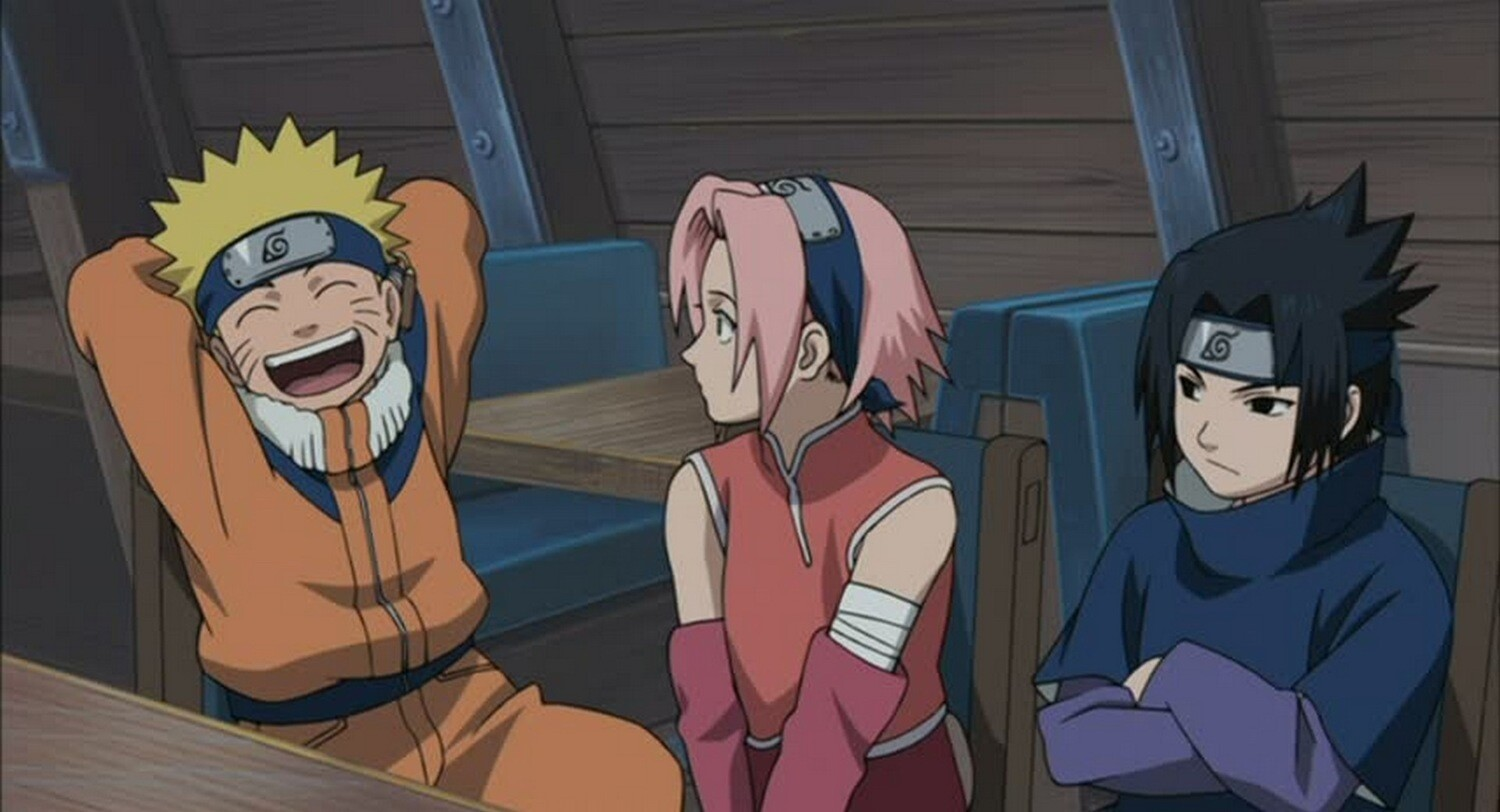

In [29]:
answer = generate_caption("https://images.kinorium.com/movie/shot/357941/w1500_51984999.jpg")

print(answer[0])
answer[1]

</s><s>The image shows a pinky and the brain logo with two cartoon mice standing in front of it. The logo is in the center of the image and the text "pinky & the brain" is written above it.</s>


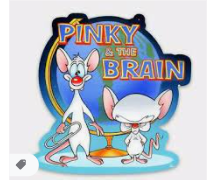

In [30]:
answer = generate_caption("/kaggle/input/anime-vs-cartoon-vs-human/Data/cartoon/0 (25).png")

print(answer[0])
answer[1]

## Шум, однородность

</s><s>The image shows a black and white photo of a person in a wheelchair at night, with the grass visible at the bottom.</s>


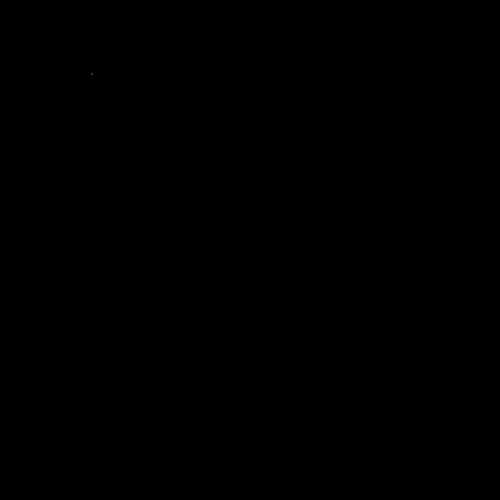

In [52]:
answer = generate_caption("https://play-lh.googleusercontent.com/cWUJV2L6u9aApAZKNkjG9_WKM8smvRguK-O2NpwLmBF2hzJ-imADntWefaWLw08sfMg=w7680-h4320")

print(answer[0])
answer[1].resize((500, 500))

</s><s>The image shows a blurry view of a field with trees in the foreground and a sky in the background. The trees are slightly blurred, giving the image a dreamy, ethereal feel.</s>


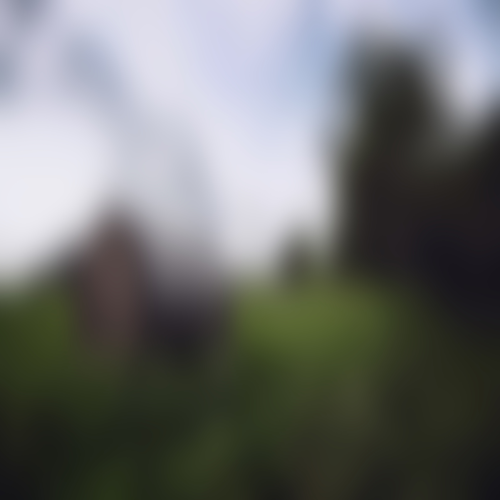

In [51]:
answer = generate_caption("https://jooinn.com/images/blur-background-11.jpg")

print(answer[0])
answer[1].resize((500, 500))

</s><s>The image shows a city skyline at night with tall buildings in the foreground and trees and light poles in the background. The sky is illuminated by the aurora borealis, creating a beautiful and serene atmosphere.</s>


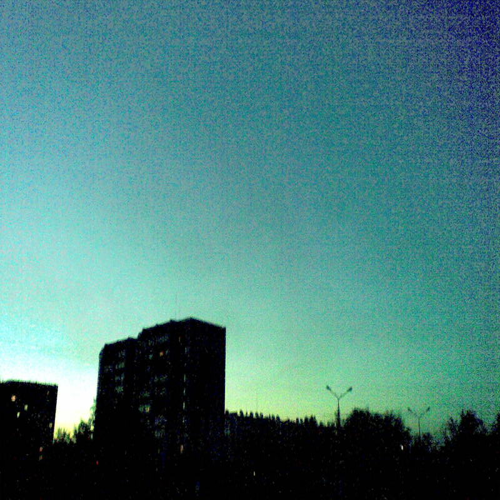

In [50]:
answer = generate_caption("https://steamuserimages-a.akamaihd.net/ugc/1764820290850853208/700C947BC7F03657147E3F0525A2C6B78EE74250/?imw=512&amp;imh=384&amp;ima=fit&amp;impolicy=Letterbox&amp;imcolor=%23000000&amp;letterbox=true")

print(answer[0])
answer[1].resize((500, 500))

</s><s>The image shows a black and white photo of a city street with a lot of squares, creating a pixelated effect. The squares are arranged in a pattern, giving the image a unique and interesting look.</s>


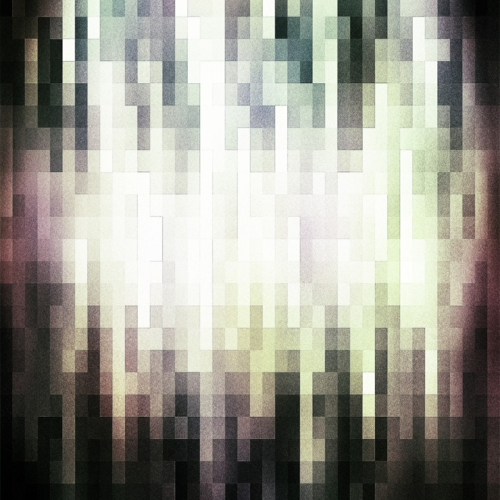

In [49]:
answer = generate_caption("https://i.ytimg.com/vi/p5is4Wc-In4/maxresdefault.jpg")

print(answer[0])
answer[1].resize((500, 500))

## Темнота

</s><s>The image shows a beautiful sunset through the trees in the woods, with the sky painted in a stunning array of oranges, pinks, and purples. The trees are silhouetted against the sky, creating a peaceful and serene atmosphere.</s>


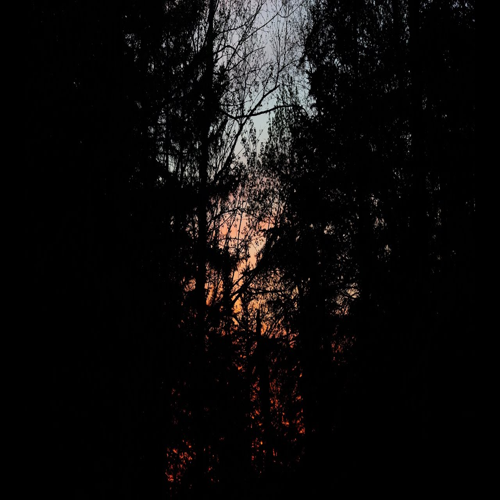

In [48]:
answer = generate_caption("https://i.ytimg.com/vi/c9kIeHUSBdM/maxresdefault.jpg")

print(answer[0])
answer[1].resize((500, 500))

</s><s>The image shows a black and white photo of a field under a cloudy sky. The ground is covered in grass and the sky is filled with dark, ominous clouds.</s>


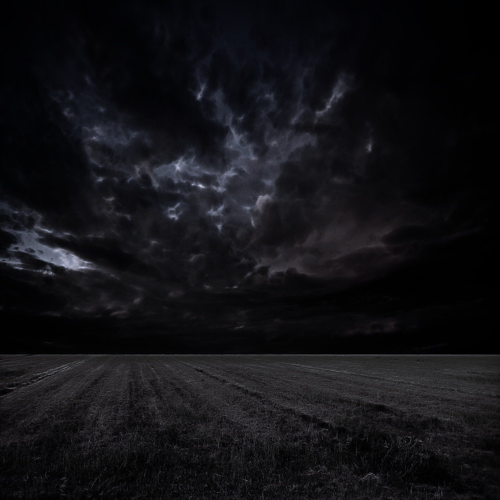

In [47]:
answer = generate_caption("https://priroda.club/uploads/posts/2023-08/1691877679_priroda-club-p-pole-les-noch-pinterest-53.jpg")

print(answer[0])
answer[1].resize((500, 500))

</s><s>The image shows a dark forest at night, with the trees silhouetted against the dark sky. The trees are illuminated by the moonlight, creating a mysterious and eerie atmosphere.</s>


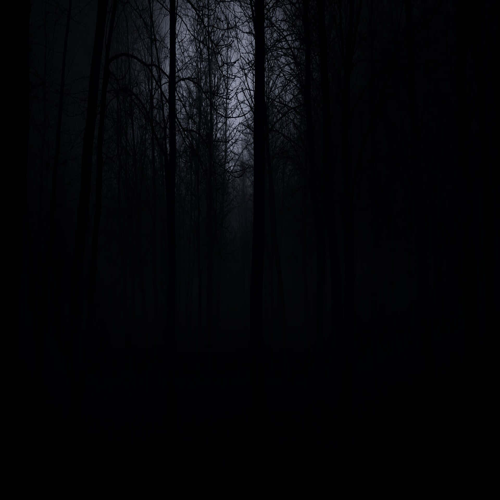

In [46]:
answer = generate_caption("https://wallpapers.com/images/hd/dark-theme-background-rw0q60hwzr3iusvf.jpg")

print(answer[0])
answer[1].resize((500, 500))

## Мемы

</s><s>The image shows a black and white drawing of a face with a smiley face, set against a white background.</s>


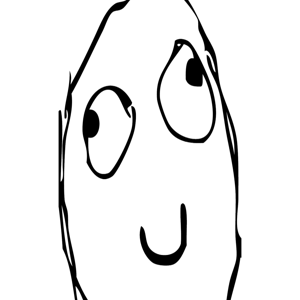

In [45]:
answer = generate_caption("https://i.ytimg.com/vi/aaVhKN4pB3M/maxresdefault.jpg")

print(answer[0])
answer[1].resize((300, 300))

</s><s><s>The image shows a drawing of a person with a rage face on a white background. The person has a wide, toothy grin and a mischievous expression, with their eyes wide open and their mouth slightly open, as if they are about to say something. The drawing is in black and white, giving it a classic, timeless look.</s>


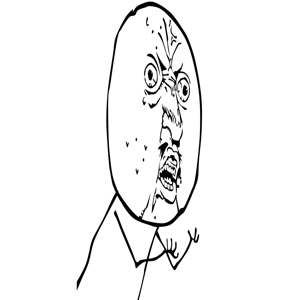

In [44]:
answer = generate_caption("https://cs14.pikabu.ru/post_img/big/2021/06/04/9/1622816576184720232.png")

print(answer[0])
answer[1].resize((300, 300))

</s><s>The image shows a black and white drawing of a rage face with an angry expression, set against a white background.</s>


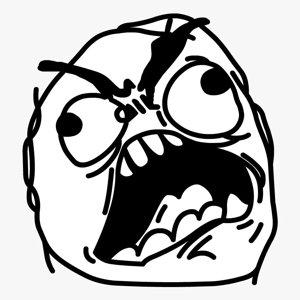

In [43]:
answer = generate_caption("https://avatars.mds.yandex.net/i?id=900134c1314ebb28c2f232bb7ad72dc5_l-9870747-images-thumbs&n=13")

print(answer[0])
answer[1].resize((300, 300))

</s><s>The image shows a black and white drawing of a man wearing a top hat and sunglasses, holding a glass of wine.</s>


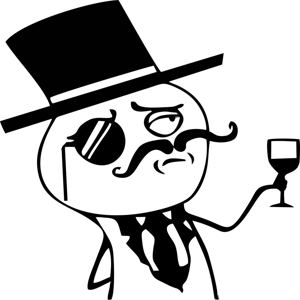

In [42]:
answer = generate_caption("https://i.etsystatic.com/11689374/r/il/21998a/875679186/il_1588xN.875679186_db6k.jpg")

print(answer[0])
answer[1].resize((300, 300))

## Из предложенных сценариев модель явно не смогла определить, что изображение является слишком зашумлённым (заблюренным) или однородным и выдавала ответы, не соответсвующие действительности.
При промпте DETAILED_CAPTION модель вполне хорошо справилась с мемами/рисунками, мультипликационными изображениями,тёмными изображениями